In [50]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import interpolate
from datetime import datetime

In [51]:
###################################################################################
###         convert dates and times of manual controls to timestamps            ###
###################################################################################

year = 2021
month = 6
day = [3, 4, 5, 7, 8, 9, 14]
hour = [22, 10, 9, 8, 11, 10, 9]
minutes = [55, 29, 22, 41, 20, 21, 4]
seconds = 0
timestamps = []

if len(day) == len(hour) == len(minutes):
    for i in range(len(day)):
        time = datetime(year, month, day[i], hour[i], minutes[i], seconds)
        timestamp = time.timestamp()
        timestamps.append(timestamp)
        print(time, 'hat den Timestamp', timestamp)

else:
    print('ungleiche Zahl an Tagen, Stunden & Minuten')

2021-06-03 22:55:00 hat den Timestamp 1622753700.0
2021-06-04 10:29:00 hat den Timestamp 1622795340.0
2021-06-05 09:22:00 hat den Timestamp 1622877720.0
2021-06-07 08:41:00 hat den Timestamp 1623048060.0
2021-06-08 11:20:00 hat den Timestamp 1623144000.0
2021-06-09 10:21:00 hat den Timestamp 1623226860.0
2021-06-14 09:04:00 hat den Timestamp 1623654240.0


In [52]:
###################################################
###         read all data form log-file         ###
###################################################

file_data = 'C:\\Users\Jan\GitRepos\data\Sud2 - Kopie.json'

time=[]
pressure=[]
airflow=[]
with open (file_data) as f:
    for line in f:
        fermentation = json.loads(line)
        time.append(fermentation['Timestamp'])
        pressure_dict=fermentation['pressure']
        pressure.append(pressure_dict['bar'])
        airflow_dict = fermentation['airflow']
        airflow.append(airflow_dict['flow'])


# ###########################################################
# ###         transofrm data into numpy arrays            ###
# ###########################################################

time = np.array(time)
time = np.multiply(0.001, time).round(decimals=0)   # transform timestamps from milliseconds to seconds
pressure = np.array(pressure)
airflow = np.array(airflow)

print('time shape:', time.shape)
print('pressure shape:', pressure.shape)
print('airflow shape:', airflow.shape)

time shape: (198915,)
pressure shape: (198915,)
airflow shape: (198915,)


In [53]:
#######################################################
###         find first and last timestamp           ###
#######################################################

print(np.where(time==1622795032)[0][0])     # zeigt Position des ersten Wertes an -> bis hier werden die Werte der Arrays gelöscht
print(np.where(time==1623654239)[0][0])     # zeigt Position des letzten Wertes an -> ab hier werden die Werte der Arrays gelöscht

20263
191423


In [54]:
###########################################################################################################
###         delete first and last values of arrays before start and after end of fermentation           ###
###########################################################################################################

time = time[20263:191424]
pressure = pressure[20263:191424]
airflow = airflow[20263:191424]
print(time[0])          # prüfe, dass wirklich mit richtigem timestamp gestartet wird
print(time[-1])         # prüfe, dass wirklich mit richtigem timestamp geendet wird

1622795032.0
1623654239.0


In [55]:
#######################################################################
###         list of wort rest in beer (manual messurement)          ###
#######################################################################

wort_rest = [12, 11.6, 10.1, 6.6, 5.1, 3.5, 2.9]
print(len(wort_rest))
print(len(timestamps))

7
7


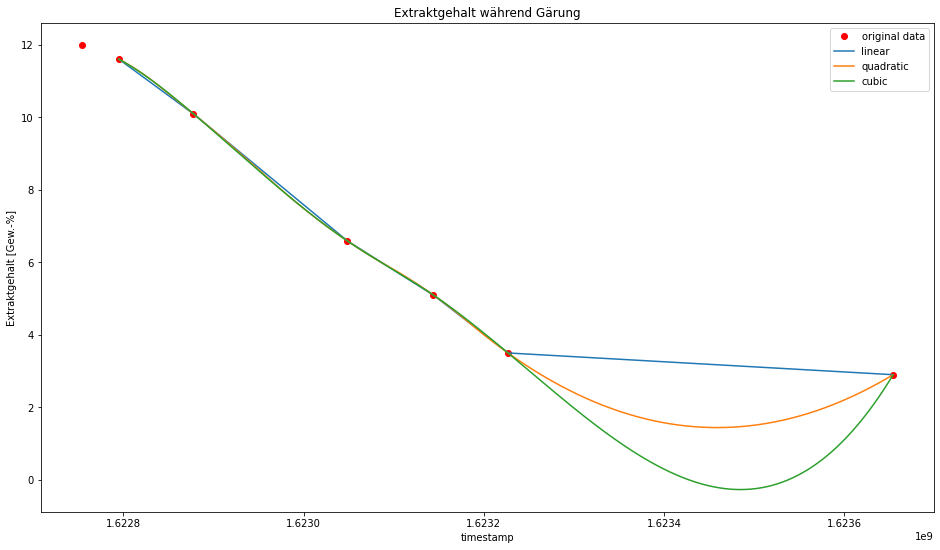

In [56]:
#######################################################
###         interpolation for wort values           ###
#######################################################
plt.figure(figsize=(16,9))
plt.title('Extraktgehalt während Gärung')
plt.plot(timestamps, wort_rest, 'ro', label='original data')

for kind in ['linear', 'quadratic', 'cubic']:
    f = interpolate.interp1d(timestamps, wort_rest, kind=kind)
    plt.plot(time, f(time), label=kind)

plt.xlabel('timestamp')
plt.ylabel('Extraktgehalt [Gew.-%]')
plt.legend()
plt.show()

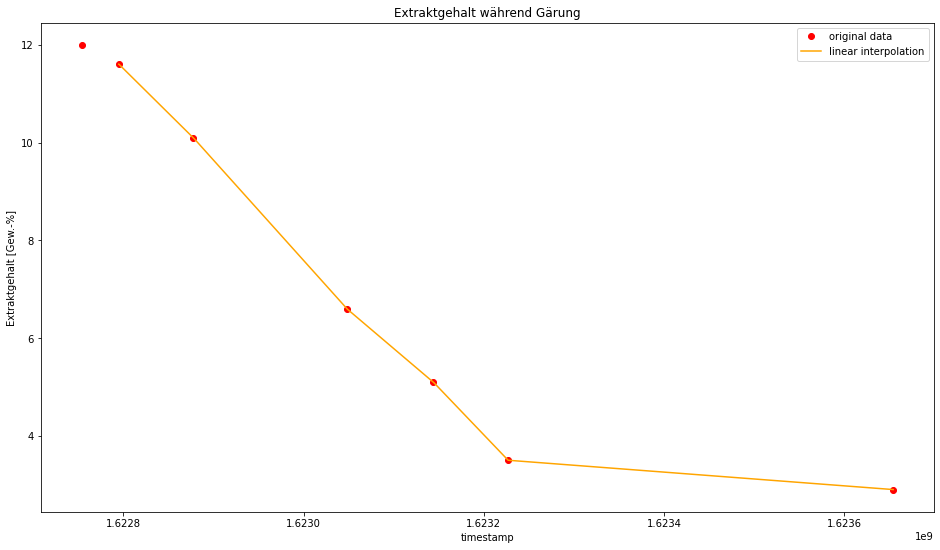

In [59]:
#################################################################
###         quadratic interpolation for wort values           ###
#################################################################

f = interpolate.interp1d(timestamps, wort_rest, kind='linear')

plt.figure(figsize=(16,9))
plt.title('Extraktgehalt während Gärung')
plt.plot(timestamps, wort_rest, 'ro', label='original data')
plt.plot(time, f(time), color='orange', label='linear interpolation')
plt.xlabel('timestamp')
plt.ylabel('Extraktgehalt [Gew.-%]')
plt.legend()
plt.show()